In [16]:
import matplotlib.pyplot as plt
from lib.preprocess import preprocess_progenitor_size, preprocess_whole_size
from lib.utils import shrink_and_align_stats
from lib.score import REF
from jf.utils.export import Exporter
import os

In [2]:
from lib.sde.grn2 import GRNMain2
from lib.sde.mutate import mutate_grn2

class Solution:
    def __init__(self, grn):
        self.grn = grn
        
    def copy(self):
        return Solution(self.grn.copy())
        
    def mutate(self):
        mutate_grn2(self.grn)

In [31]:
def show_curve_progenitor(stats, ref, max_step=None, show=True):
    """
    The evaluation function for progenitor population size.
    The lower is the better
    :param stats: the stats of the bb after running
    """
    stats, ref = shrink_and_align_stats(stats, ref, max_step=max_step)
    
    x, y = preprocess_progenitor_size(stats, ref)
    
    plt.plot(ref.index, x, label="Reference Prog")
    plt.plot(ref.index, y, label="Simulation Prog")
    
    plt.legend()
    
    if show:
        plt.show()

In [3]:
def show_curve(stats, ref, max_step=None, show=True):
    """
    The evaluation function for progenitor population size.
    The lower is the better
    :param stats: the stats of the bb after running
    """
    stats, ref = shrink_and_align_stats(stats, ref, max_step=max_step)
    
    x, y = preprocess_progenitor_size(stats, ref)
    
    plt.plot(ref.index, x, label="Reference Prog")
    plt.plot(ref.index, y, label="Simulation Prog")
    
    x, y = preprocess_whole_size(stats, ref)
    
    plt.plot(ref.index, x, label="Reference Whole")
    plt.plot(ref.index, y, label="Simulation Whole")
    
    plt.legend()
    
    if show:
        plt.show()

In [168]:
os.listdir("output/")

['results',
 'multi_mutate_p3',
 'logs',
 '2022-01-13',
 '2022-01-10',
 'abs_score',
 'norm_fitval_median',
 'default',
 '2022-01-12',
 'test_ts_0.125_true',
 'test_ts_0.125',
 'test',
 '2022-01-05',
 '2022-01-04']

In [182]:
exporter = Exporter(name="abs_score")

Exporting at output/abs_score


In [183]:
sorted(exporter.list())

['definition',
 'generation_g0',
 'generation_g1',
 'generation_g10',
 'generation_g11',
 'generation_g12',
 'generation_g13',
 'generation_g14',
 'generation_g15',
 'generation_g16',
 'generation_g17',
 'generation_g18',
 'generation_g19',
 'generation_g2',
 'generation_g20',
 'generation_g21',
 'generation_g22',
 'generation_g23',
 'generation_g24',
 'generation_g25',
 'generation_g26',
 'generation_g3',
 'generation_g4',
 'generation_g5',
 'generation_g6',
 'generation_g7',
 'generation_g8',
 'generation_g9',
 'out']

In [184]:
def pick_best_sol_stats(res):
    fit = res['fitness']
    index = fit.index(max(fit))
    sol = res["solution"][index]
    stats = res["stats"][index]
    print("fit is ", max(fit))
    return sol, stats

fit is  69.38594056291903


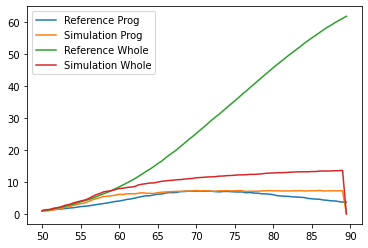

In [185]:
res = exporter.load("generation_g24")
sol, stats = pick_best_sol_stats(res)
show_curve(stats, REF)

In [191]:
stats.iloc[30 * 8], REF.iloc[30 * 2]

(progenitor_pop_size    181.0
 size_type_Cell         181.0
 time                    80.0
 whole_pop_size         321.0
 Name: 80.0, dtype: float64,
 Unnamed: 0                 60.0
 time                       79.0
 progenitor_pop_size       336.0
 size_type_Cycling         270.0
 whole_pop_size           2572.8
 size_type_PostMitotic      66.0
 Name: 60, dtype: float64)

## DEBUG

In [202]:
from lib.score import score_both_size, score_whole_size, score_progenitor_size
from lib.preprocess import preprocess_whole_size, preprocess_progenitor_size
from lib.utils import shrink_and_align_stats

In [195]:
S, R = shrink_and_align_stats(stats, REF, 83, 80)

In [209]:
def score_coefficient_variation_old(x, y):
    print(x)
    return sum([(x_ - y_)**2 / x_ for x_, y_ in zip(x, y)])


def score_coefficient_variation(x, y):
    return sum([(x_ - y_)**2 / np.sqrt(np.abs(x_)) for x_, y_ in zip(x, y)])


def score_progenitor_size_old(stats, ref=REF, max_step=None, min_step=None):
    stats, ref = shrink_and_align_stats(stats, ref, max_step, min_step)
    x, y = preprocess_progenitor_size(stats, ref)
    return score_coefficient_variation_old(x, y)


def score_whole_size_old(stats, ref=REF, max_step=None, min_step=None):
    stats, ref = shrink_and_align_stats(stats, ref, max_step, min_step)
    x, y = preprocess_whole_size(stats, ref)
    return score_coefficient_variation_old(x, y)

def score_both_size_old(stats, ref=REF, max_step=None, min_step=None):
    return score_progenitor_size_old(stats, ref, max_step, min_step) + score_whole_size_old(stats, ref, max_step, min_step)

In [210]:
print(score_both_size_old(stats, REF, 83, 80))
print(score_whole_size_old(stats, REF, 83, 80))
print(score_progenitor_size_old(stats, REF, 83, 80))

[1.0, 0.9517326732673268, 0.9313118811881188, 0.9176980198019803, 0.9115099009900991, 0.8867574257425743, 0.8793316831683168]
[1.0, 1.0209987385916748, 1.0417748757141796, 1.0626994138161312, 1.084365956815315, 1.1040290865919715, 1.1239148178377978]
0.07503857404410254
[1.0, 1.0209987385916748, 1.0417748757141796, 1.0626994138161312, 1.084365956815315, 1.1040290865919715, 1.1239148178377978]
0.02331146591656227
[1.0, 0.9517326732673268, 0.9313118811881188, 0.9176980198019803, 0.9115099009900991, 0.8867574257425743, 0.8793316831683168]
0.051727108127540264


In [208]:
print(score_both_size(stats, REF, 83, 80))
print(score_whole_size(stats, REF, 83, 80))
print(score_progenitor_size(stats, REF, 83, 80))

0.07503857404410254
0.02331146591656227
0.051727108127540264


In [211]:
def align_time(df_data, df_ref):
    min_step = max(min(df_data.time), min(df_ref.time))
    max_step = max(df_ref.time)

    new_df_data = df_data[(df_data.time >= min_step) & (df_data.time <= max_step)]
    new_df_ref = df_ref[(df_ref.time >= min_step) & (df_ref.time <= max_step)]

    return new_df_data, new_df_ref


def normalize_time(df_data, df_ref, col_data, col_ref):
    df_data = df_data.copy()
    df_ref = df_ref.copy()
    df_data[col_data] /= df_data[col_data].get(min(df_data.time))
    df_ref[col_ref] /= df_ref[col_ref].get(min(df_ref.time))
    
    return df_data, df_ref


def shrink_time(df_data, df_ref, min_time=None, max_time=None):
    min_step = min_time if min_time is not None else min(df_ref.time)
    max_step = max_time if max_time is not None else max(df_ref.time)
    new_df_data = df_data[(df_data.time >= min_step) & (df_data.time <= max_step)]
    new_df_ref = df_ref[(df_ref.time >= min_step) & (df_ref.time <= max_step)]

    return new_df_data, new_df_ref


def as_time_lists(df_data, df_ref, col_data, col_ref):
    x = [df_ref[col_ref].get(t, 0) for t in df_ref.index]
    y = [df_data[col_data].get(t, 0) for t in df_ref.index]
    return x, y

def score_whole_size_new(stats, ref=REF, max_step=None, min_step=None):
    colname = "whole_pop_size"
    stats, ref = align_time(stats, ref)
    stats, ref = normalize_time(stats, ref, col_data=colname, col_ref=colname)
    stats, ref = shrink_time(stats, ref, min_step, max_step)
    x, y = as_time_lists(stats, ref, col_data=colname, col_ref=colname)
    
    return score_coefficient_variation_old(x, y)

In [212]:
score_whole_size_new(stats, REF, 83, 80)

[1.3735222176926212, 1.402364451691806, 1.430900937627395, 1.459641255605381, 1.4894007337953528, 1.5164084794129638, 1.5437219730941705]


10.215960048919689

In [ ]:
# score_both_size(bb.stats, prun.ref, max_step=step.end_time, min_step=previous_time)

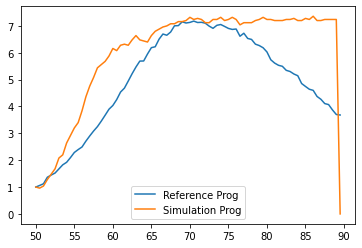

In [186]:
show_curve_progenitor(stats, REF)

fit is  63.537242326569014


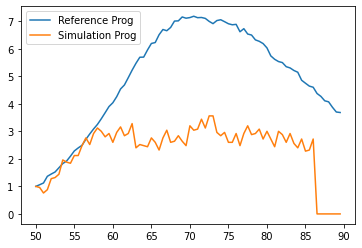

>> G_0: init: 0.32; noise: 1.02; b: 2.34; m: 8.54; expr: 5.06; deg: 2.76; thr: 0.66; theta: 9.50; tree : 6
>> G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.87; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : (NOT (NOT NOT 4 AND 5) OR 1)
>> G_2: init: 1.39; noise: 9.04; b: 1.55; m: 3.12; expr: 4.94; deg: 9.05; thr: 3.22; theta: 3.86; tree : (2 OR NOT 6)
>> G_3: init: 1.03; noise: 2.01; b: 5.22; m: 7.24; expr: 3.81; deg: 0.75; thr: 4.08; theta: 3.23; tree : NOT 2
>> G_4: init: 2.03; noise: 8.15; b: 4.34; m: 5.41; expr: 9.35; deg: 2.15; thr: 9.60; theta: 4.10; tree : 3
>> G_5: init: 1.56; noise: 3.34; b: 5.35; m: 5.10; expr: 3.05; deg: 0.12; thr: 6.67; theta: 6.82; tree : (((3 OR 4) OR 1) OR (5 AND 6))
>> G_6: init: 0.08; noise: 2.56; b: 1.86; m: 9.61; expr: 5.66; deg: 5.25; thr: 4.11; theta: 0.38; tree : 5

In [47]:
res = exporter.load("generation_g47")
sol, stats = pick_best_sol_stats(res)
show_curve_progenitor(stats, REF)
sol.grn

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 3) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 7.90; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.87; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : (NOT (NOT NOT 4 AND 5) OR 1)